In [82]:

import pandas as pd
import numpy as np
import plotly
from plotly import __version__#
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn import metrics
import datetime
from sklearn.ensemble import ExtraTreesRegressor



In [75]:
train_df = pd.read_csv('train.csv')
features_df = pd.read_csv('features.csv')
store_df = pd.read_csv('stores.csv')#
train_df.info()
#features_df.head()
#store_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [76]:
features_df.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1,inplace=True)

In [77]:
features_df['CPI'].fillna(features_df['CPI'].mean(),inplace=True)
features_df['Unemployment'].fillna(features_df['Unemployment'].mean(),inplace=True)



In [78]:
train_x=pd.DataFrame()
train_x=store_df.merge(train_df,on='Store')
train_x=train_x.merge(features_df,on=['Date','Store','IsHoliday'])


train_x['year'] = [int(x[0:4]) for x in list(train_x['Date'])]
train_x['month'] = [int(x[5:7]) for x in list(train_x['Date'])]
train_x['day'] = [int(x[8:]) for x in list(train_x['Date'])]
train_x.drop(['Date'],axis=1,inplace=True)

In [79]:
train_x['Type'].replace(['A','B','C'],[0,1,2],inplace=True)



In [7]:
X = train_x.as_matrix().astype(np.float)


In [8]:
X

array([[  1.00000000e+00,   0.00000000e+00,   1.51315000e+05, ...,
          2.01000000e+03,   2.00000000e+00,   5.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.51315000e+05, ...,
          2.01000000e+03,   2.00000000e+00,   5.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   1.51315000e+05, ...,
          2.01000000e+03,   2.00000000e+00,   5.00000000e+00],
       ..., 
       [  4.50000000e+01,   1.00000000e+00,   1.18221000e+05, ...,
          2.01200000e+03,   1.00000000e+01,   2.60000000e+01],
       [  4.50000000e+01,   1.00000000e+00,   1.18221000e+05, ...,
          2.01200000e+03,   1.00000000e+01,   2.60000000e+01],
       [  4.50000000e+01,   1.00000000e+00,   1.18221000e+05, ...,
          2.01200000e+03,   1.00000000e+01,   2.60000000e+01]])

In [9]:
X.shape

(421570, 13)

In [12]:
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)

In [13]:
X

array([[-1.65819926, -0.8853067 ,  0.23920895, ..., -1.21548691,
        -1.37194493, -1.21929331],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -1.21548691,
        -1.37194493, -1.21929331],
       [-1.65819926, -0.8853067 ,  0.23920895, ..., -1.21548691,
        -1.37194493, -1.21929331],
       ..., 
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.29431678,
         1.09474444,  1.17973642],
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.29431678,
         1.09474444,  1.17973642],
       [ 1.78325781,  0.61543819, -0.30348902, ...,  1.29431678,
         1.09474444,  1.17973642]])

In [80]:
train_x.drop(['Weekly_Sales'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.3, random_state=101)

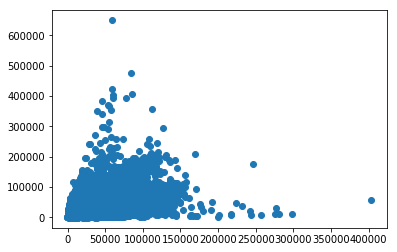

In [83]:
clf = ExtraTreesRegressor(n_estimators=200,max_features='log2')
clf.fit(X_train,y_train)
predict = clf.predict(X_test)
plt.scatter(predict,y_test)



17160.239243469805

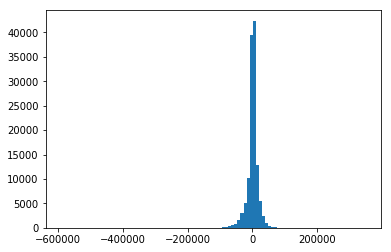

In [88]:
error=predict-y_test
plt.hist(error,bins=100)
error.mean()
error.std()

In [14]:
dfnew=pd.DataFrame(X)

In [15]:
dfnew

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.658199,-0.885307,0.239209,-1.418742,0.393782,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
1,-1.658199,-0.885307,0.239209,-1.385947,1.524538,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
2,-1.658199,-0.885307,0.239209,-1.353151,-0.098680,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
3,-1.658199,-0.885307,0.239209,-1.320356,1.055551,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
4,-1.658199,-0.885307,0.239209,-1.287560,0.715425,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
5,-1.658199,-0.885307,0.239209,-1.254765,-0.450538,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
6,-1.658199,-0.885307,0.239209,-1.221970,0.224683,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
7,-1.658199,-0.885307,0.239209,-1.189174,1.063255,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
8,-1.658199,-0.885307,0.239209,-1.156379,0.041818,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293
9,-1.658199,-0.885307,0.239209,-1.123583,0.649031,-0.275106,-0.963798,-1.720834,1.018774,0.078201,-1.215487,-1.371945,-1.219293


In [17]:
dfnew_y=pd.DataFrame()

dfnew_y['Weekly_Sales']=dfnew[4]
dfnew_y.head()


,Weekly_Sales
0,0.393782
1,1.524538
2,-0.098680
3,1.055551
4,0.715425


In [18]:
dfnew.drop([4],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfnew, dfnew_y, test_size=0.5, random_state=101)

In [19]:
from skle arn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[-0.05384006  0.05669282  0.27819236  0.14998253  0.01061757  0.01359912
   0.00075435 -0.03554636 -0.0190057  -0.00659303  0.02195027 -0.00751329]]


Text(0,0.5,'Predicted Y')

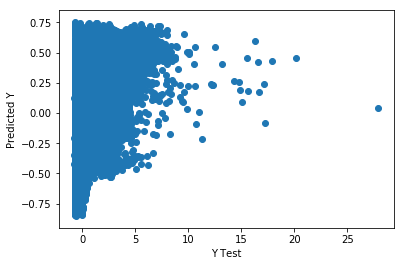

In [26]:
predictions = lm.predict( X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [59]:
train_y=train_x['Weekly_Sales']


In [60]:
#train_x.drop(['Weekly_Sales'],axis=1,inplace=True)
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(dfnew, dfnew_y, test_size=0.3, random_state=101)
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(train_x,
                                                    train_y,
                                                    test_size=0.2,
                                                    random_state=0)

In [61]:
parameters = {
              'n_estimators': 500, 
              'max_depth': 4, 
              'min_samples_split': 1.0,
              'learning_rate': 0.01, 
              'loss': 'ls'
             }

In [62]:
from sklearn import ensemble
from sklearn import metrics
classifier = ensemble.GradientBoostingRegressor(**parameters)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Square Error: {:.3f}'.format(mse))


Mean Square Error: 15802886.042


In [71]:
parameters = {
              'n_estimators': 3000, 
              'max_depth': 6, 
              'learning_rate': 0.04, 
              'loss': 'huber'
             }
classifier = ensemble.GradientBoostingRegressor(**parameters)

classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
mse = metrics.mean_squared_error(y_test, predictions)
print('Mean Squared Error: {:.3f}'.format(mse))

KeyboardInterrupt: 

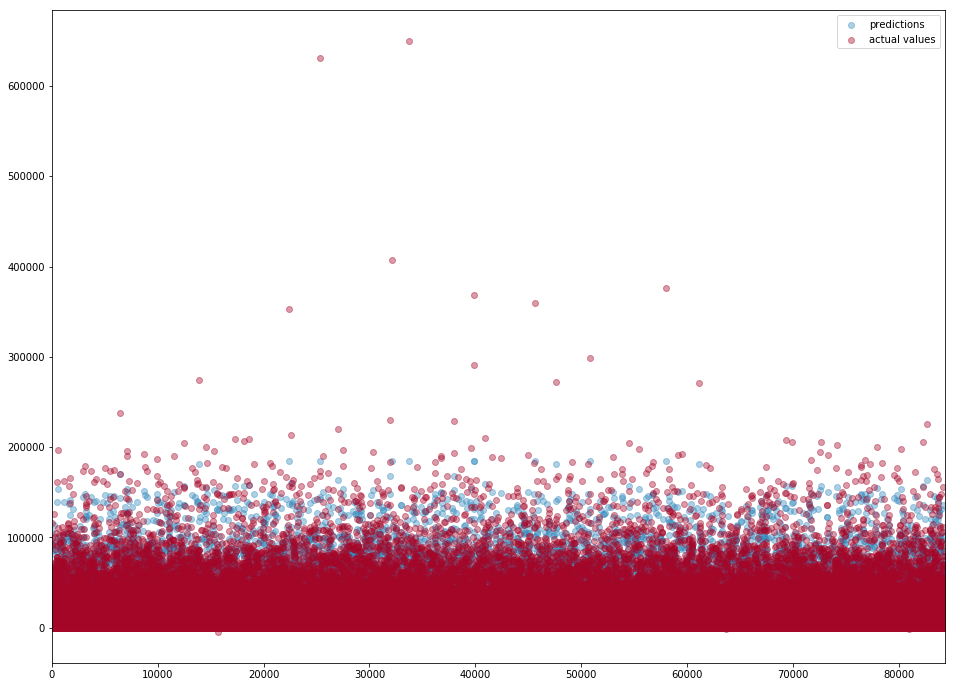

In [63]:
plt.figure(figsize=(16, 12))

plt.scatter(range(predictions.shape[0]), predictions, label='predictions', c='#348ABD', alpha=0.4)
plt.scatter(range(y_test.shape[0]), y_test, label='actual values', c='#A60628', alpha=0.4)
##plt.ylim([y_test.min(), predictions.max()])
plt.xlim([0, predictions.shape[0]])
plt.legend();

In [73]:
test_score = [classifier.loss_(y_test, y_pred) for y_pred in classifier.staged_decision_function(X_test)]

plt.figure(figsize=(16, 12))
plt.title('Deviance');
plt.plot(np.arange(parameters['n_estimators']) + 1, classifier.train_score_, c='#348ABD',
         label='Training Set Deviance');
plt.plot(np.arange(parameters['n_estimators']) + 1, test_score, c='#A60628',
         label='Test Set Deviance');
plt.annotate('Overfit Point', xy=(600, test_score[600]), xycoords='data',
            xytext=(420, 0.06), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc"),
            )
plt.legend(loc='upper right');
plt.xlabel('Boosting Iterations');
plt.ylabel('Deviance')


AttributeError: 'GradientBoostingRegressor' object has no attribute 'decision_function'